<a href="https://colab.research.google.com/github/utkarshg1/Test1/blob/main/Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hypothesis testing
1. Numerical vs Numerical - correlation
2. Numerical vs Categorical - ANOVA (Analysis Of Variance)
3. Categorical vs Categorical - Chisquared

In [1]:
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/tips.csv"
print(url)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/tips.csv


In [2]:
import pandas as pd
df = pd.read_csv(url)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Perform basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [4]:
df.isna().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [5]:
df.duplicated().sum()

1

In [6]:
df = df.drop_duplicates(keep="first").reset_index(drop=True)

In [7]:
df.shape

(243, 7)

### Numerical Vs Numerical - Correlation

In [9]:
df.corr(numeric_only=True)

,total_bill,tip,size
total_bill,1.000000,0.674998,0.597589
tip,0.674998,1.000000,0.488400
size,0.597589,0.488400,1.000000


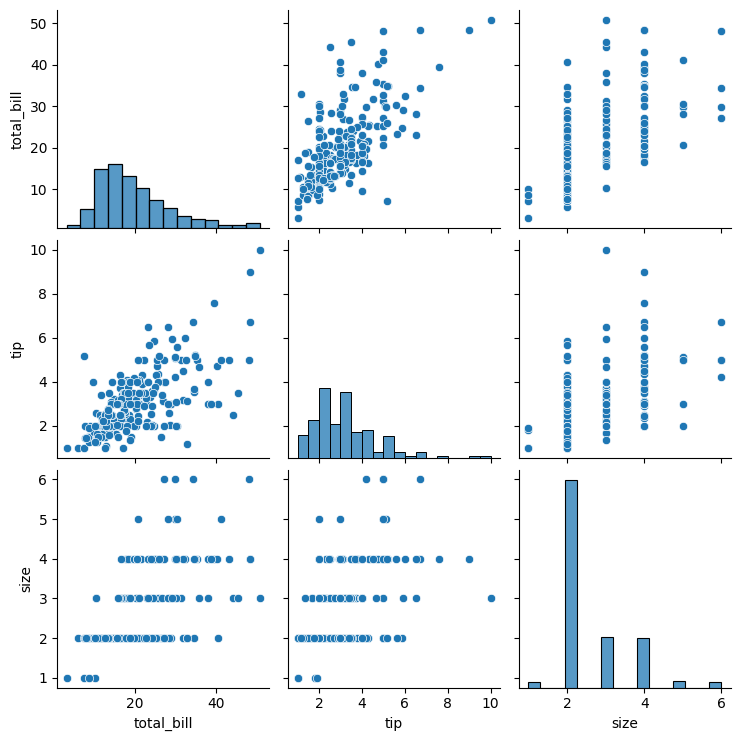

In [10]:
import seaborn as sns
sns.pairplot(df)

### 2. Cateorical vs continuous (ANOVA - Analysis of Variance)

### Check whether there relationship between day and total_bill

In [14]:
import statsmodels.api as sm

In [15]:
from statsmodels.formula.api import ols

In [16]:
model = ols("total_bill ~ C(day)", data=df).fit()

In [17]:
anova_table = sm.stats.anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(day),3.0,619.990391,206.663464,2.656623,0.049079
Residual,239.0,18592.235172,77.791779,NaN,NaN


In [18]:
p_value = anova_table.iloc[0, -1]
p_value

0.049079098725079165

### If p_value <= 0.05 means there is significant relationship between day and total_bill

In [19]:
def anova(df, cat_col, con_col):
  model = ols(f"{con_col} ~ C({cat_col})", data=df).fit()
  anova_table = sm.stats.anova_lm(model)
  p_value = anova_table.iloc[0, -1]
  if p_value <= 0.05:
    print(f"There is Significant Relationship between {cat_col} and {con_col}")
  else:
    print(f"There is NO relation between {cat_col} and {con_col}")
  return p_value

In [20]:
anova(df, "day", "tip")

There is NO relation between day and tip


0.19044935091812423

In [21]:
anova(df, "day", "size")

There is Significant Relationship between day and size


0.007396003452195621

### Cateogorical vs categorical
chi2 test

### Day vs smoker is there a significant relatioship

In [22]:
ctab1 = pd.crosstab(df["day"], df["smoker"])
ctab1

smoker,No,Yes
day,,
Fri,4,15
Sat,45,42
Sun,57,19
Thur,45,16


In [23]:
from scipy.stats import chi2_contingency

In [24]:
res = chi2_contingency(ctab1)
res

Chi2ContingencyResult(statistic=26.495594566359546, pvalue=7.509861324889486e-06, dof=3, expected_freq=array([[11.80658436,  7.19341564],
       [54.0617284 , 32.9382716 ],
       [47.22633745, 28.77366255],
       [37.90534979, 23.09465021]]))

In [27]:
p_value2 = res[1]
p_value2

7.509861324889486e-06

### If p_value <= 0.05 means significant relationship between 2 features

In [28]:
def chi2_test(df, cat_col1, cat_col2):
  ctab = pd.crosstab(df[cat_col1], df[cat_col2])
  res = chi2_contingency(ctab)
  p_value = res[1]
  if p_value <= 0.05:
    print(f"There is Significant Relationship between {cat_col1} and {cat_col2}")
  else:
    print(f"There is NO relation between {cat_col1} and {cat_col2}")
  return p_value

In [29]:
chi2_test(df, "sex", "smoker")

There is NO relation between sex and smoker


0.9868322962834231

In [30]:
chi2_test(df, "time", "sex")

There is Significant Relationship between time and sex


0.0032989241826958974